In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MEAO = pd.read_excel('G:\Priyabrata\ML\Material data repository.xlsx')
INPUT=MEAO.iloc[:,2:11]  #all INPUT (Variables)
normalized_INPUT=(INPUT-INPUT.mean())/INPUT.std()
TARGET=MEAO.iloc[:,20]   #all PHASES SS,SS+IM,AM
#TARGET = MEAO.iloc[:,19]

Y=MEAO.iloc[:,22] #coded phases. 0:SS, 1:SS+IM, 2:AM
#Y = MEAO.iloc[:,23] #coded phases. 0:MSS, 1:SSS, 2:SS+IM, 3:AM



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.4s finished


f1 score: 0.863 (0.054)

Maximum f1 score:  0.960727969348659

Minimum f1 score:  0.689634534096435


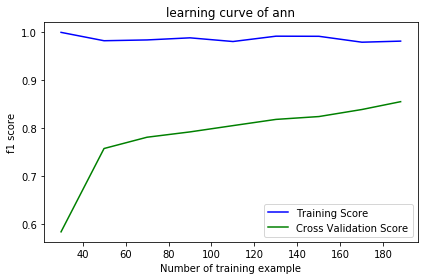

In [11]:
#with all features including VEC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model2 = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='sdg', alpha=0.0000001, batch_size=15, learning_rate='adaptive', learning_rate_init=0.1,max_iter=15000, shuffle=True, warm_start='False') #batch size has no meaning for lbfgs
    
# evaluate model
scores = cross_val_score(model2, normalized_INPUT, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model2, normalized_INPUT, Y, train_sizes=[30,50,70,90,110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[30,50,70,90,110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of ann")
plt.xlabel("Number of training example")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.5s finished


f1 score: 0.861 (0.048)

Maximum f1 score:  0.9443502824858756

Minimum f1 score:  0.7113997113997114


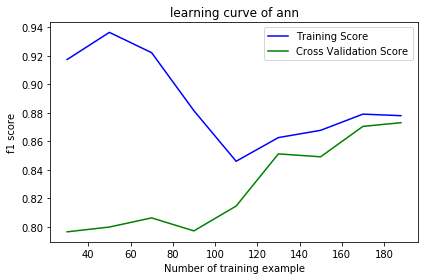

In [6]:
#without mixing enthalpy
selected_INPUT1 = INPUT.drop(['Mixing entropy','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT1

normalized_INPUT1=(selected_INPUT1-selected_INPUT1.mean())/selected_INPUT1.std()
normalized_INPUT1
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
    
# evaluate model
scores = cross_val_score(model2, normalized_INPUT1, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model2, normalized_INPUT1, Y, train_sizes=[30,50,70,90,110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[30,50,70,90,110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of ann")
plt.xlabel("Number of training example")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.2s finished


f1 score: 0.801 (0.074)

Maximum f1 score:  0.9208683473389355

Minimum f1 score:  0.614367816091954


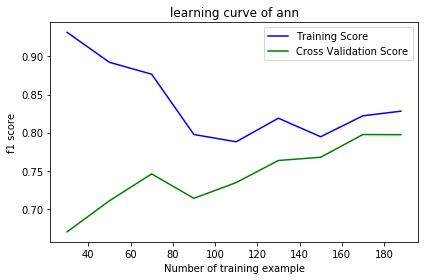

In [42]:
#drop Atomic size mismatch
selected_INPUT2 = INPUT.drop(['Mixing entropy','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT2

normalized_INPUT2=(selected_INPUT2-selected_INPUT2.mean())/selected_INPUT2.std()
normalized_INPUT2

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

# evaluate model
scores = cross_val_score(model2, normalized_INPUT2, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model2, normalized_INPUT2, Y, train_sizes=[30,50,70,90,110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[30,50,70,90,110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of ann")
plt.xlabel("Number of training example")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [70]:
#drop Λ
selected_INPUT3 = INPUT.drop(['Mixing entropy','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT3

normalized_INPUT3=(selected_INPUT3-selected_INPUT3.mean())/selected_INPUT3.std()
normalized_INPUT3

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
 
# evaluate model
scores = cross_val_score(model2, normalized_INPUT3, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s


f1 score: 0.882 (0.048)

Maximum f1 score:  0.9769916594765603

Minimum f1 score:  0.7174863387978142


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


In [15]:
#drop Ω
selected_INPUT4 = INPUT.drop(['Mixing entropy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT4

normalized_INPUT4=(selected_INPUT4-selected_INPUT4.mean())/selected_INPUT4.std()
normalized_INPUT4

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT4, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s


f1 score: 0.856 (0.054)

Maximum f1 score:  0.9603174603174603

Minimum f1 score:  0.7402709810579581


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


In [19]:
#drop atomic size mismatch and Ω
selected_INPUT5 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s


f1 score: 0.776 (0.072)

Maximum f1 score:  0.9118279569892472

Minimum f1 score:  0.5881492948056416


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished


In [59]:
#No drop
selected_INPUT6 = INPUT.drop(['Mixing entropy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT6

normalized_INPUT6=(selected_INPUT6-selected_INPUT6.mean())/selected_INPUT6.std()
normalized_INPUT6


from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
 
# evaluate model
scores = cross_val_score(model2, normalized_INPUT6, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


f1 score: 0.872 (0.048)

Maximum f1 score:  0.9769916594765603

Minimum f1 score:  0.7520255413993554


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished


In [30]:
#drop atomic size mismatch and Λ
selected_INPUT5 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s


f1 score: 0.703 (0.065)

Maximum f1 score:  0.8612344783830327

Minimum f1 score:  0.5791063966570235


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished


In [31]:
#drop atomic size mismatch and Mixing enthalpy
selected_INPUT5 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s


f1 score: 0.802 (0.071)

Maximum f1 score:  0.9206349206349206

Minimum f1 score:  0.44922341696535245


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.3s finished


In [36]:
#drop Ω and Λ
selected_INPUT5 = INPUT.drop(['Mixing entropy','Ω','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s


f1 score: 0.856 (0.049)

Maximum f1 score:  0.9389778794813121

Minimum f1 score:  0.7227053140096619


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


In [39]:
#drop Ω and Mixing enthalpy
selected_INPUT5 = INPUT.drop(['Mixing entropy','Ω','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s


f1 score: 0.677 (0.053)

Maximum f1 score:  0.7622549019607843

Minimum f1 score:  0.5764895330112721


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished


In [44]:
#drop Λ and Mixing enthalpy
selected_INPUT5 = INPUT.drop(['Mixing entropy','Λ','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
   
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


f1 score: 0.865 (0.065)

Maximum f1 score:  0.9769916594765603

Minimum f1 score:  0.6746031746031745


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


In [46]:
#Keep mixing enthalpy
selected_INPUT5 = INPUT.drop(['Mixing entropy','Λ','Atomic size mismatch','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s


f1 score: 0.706 (0.055)

Maximum f1 score:  0.8141923436041082

Minimum f1 score:  0.5616413916146299


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


In [55]:
#Keep atomic size mismatch
selected_INPUT5 = INPUT.drop(['Mixing entropy','Λ','Mixing enthalpy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
  
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s


f1 score: 0.704 (0.055)

Maximum f1 score:  0.8171296296296297

Minimum f1 score:  0.5959827103991864


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished


In [56]:
#Keep Λ
selected_INPUT5 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Mixing enthalpy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
 
# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s


f1 score: 0.652 (0.058)

Maximum f1 score:  0.8118872549019608

Minimum f1 score:  0.5537988581466843


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


In [57]:
#Keep Ω
selected_INPUT5 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Mixing enthalpy','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

# evaluate model
scores = cross_val_score(model2, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, verbose=3,n_jobs=-1)
scores
print('f1 score: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


f1 score: 0.657 (0.074)

Maximum f1 score:  0.8298296367727418

Minimum f1 score:  0.5142045454545454


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished
